# Lab-6 SVM:
In this lab, we will see an examples of how to use SVM for classification tasks
## Lab-6 Objectives
1. SVM basics
2. Softmargin SVM.
3. Kernel SVM
### Recap

1. **What is SVM? Is it used for classification or regression?**
   - SVM stands for Support Vector Machine. It is primarily used for classification tasks, but it can also be adapted for regression problems.

2. **What are Support Vectors?**
   - Support Vectors are the data points that are closest to the hyperplane and influence its position and orientation. They are critical in determining the margin and are the key elements in SVM.

3. **What is a Hyperplane?**
   - A Hyperplane is a decision boundary that separates the different classes in the feature space. In SVM, the goal is to find the optimal hyperplane that maximizes the margin between the classes.

4. **What is a Margin?**
   - The Margin is the distance between the hyperplane and the closest data points (support vectors) from either class. In SVM, the goal is to maximize this margin, which helps in creating a robust and generalizable model.

5. **How does SVM work?**
   - SVM works by finding the optimal hyperplane that best separates the classes in the feature space. It maximizes the margin between the classes by identifying the support vectors, which are the data points closest to the hyperplane. SVM can also handle non-linearly separable data by using kernel functions to map the data into a higher-dimensional space where it becomes linearly separable.


#### Import libraries

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

* We will first consider the simple case of a classification task, in which the two classes of points are **well** separated into two classes:

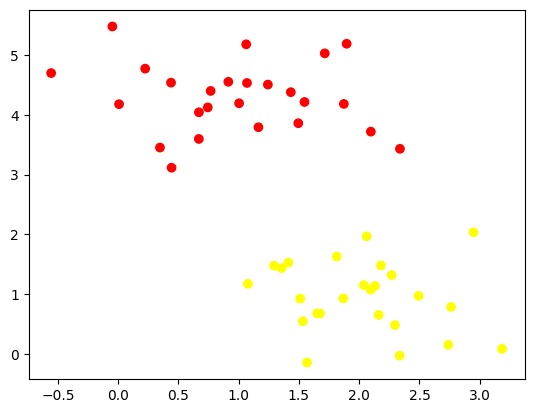

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn')

* We will draw three lines that can separate these two classe. Depending on which line you choose, a new data point (e.g., the one marked by the "X" in this plot) will be assigned a different label! Evidently our simple intuition of "drawing a line between classes" is not enough, and we need to consider the **margin**.

(-1.0, 3.5)

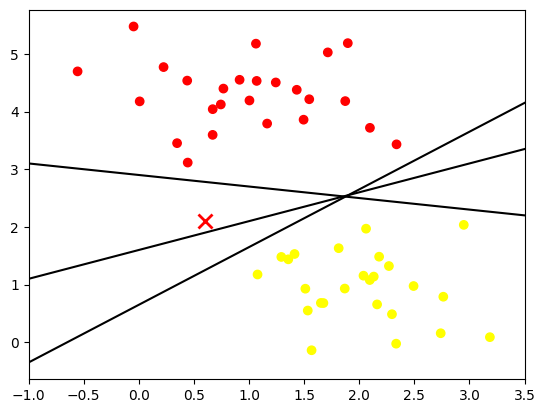

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y,  cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

* We will draw around each line a **margin** of some width, up to the nearest point. The line that maximizes this margin is the one we will choose as the optimal model.

(-1.0, 3.5)

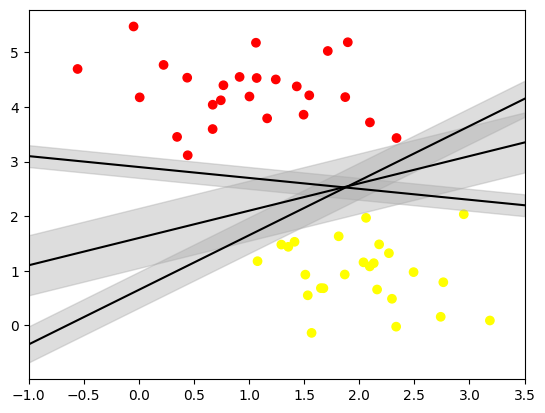

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y,  cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

### Support vector classifier
Fit a simple SVC for classifing the previous data

In [5]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(X, y)

SVC(kernel='linear')

 ##### plot the svc decision function

The relationship between the fitted value and the class prediction for a given observation is simple: if the fitted value exceeds zero then the observation is assigned to one class, and if it is less than zero than it is assigned to the other.

In order to obtain the fitted values for a given SVM model fit, we use the  .𝚍𝚎𝚌𝚒𝚜𝚒𝚘𝚗⎯𝚏𝚞𝚗𝚌𝚝𝚒𝚘𝚗()  method of the SVC

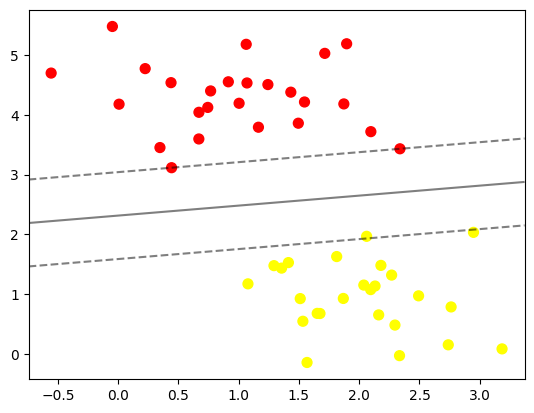

In [6]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])


    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

* SVMs decision function depends on some subset of the training data, called the support vectors. Some properties of these support vectors can be found in attributes support_vectors_, support_ and n_support_:

In [7]:
support_vectors_ = model.support_vectors_
support_ = model.support_
n_support_ = model.n_support_

print("Support vectors :", support_vectors_)
print("Indices of the support vectors :", support_)
print("Number of the support vectors :", n_support_)

Support vectors : [[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [2.06156753 1.96918596]]
Indices of the support vectors : [18 25  7]
Number of the support vectors : [2 1]


* Let's see how the number of samples affect the svm model and it's margin

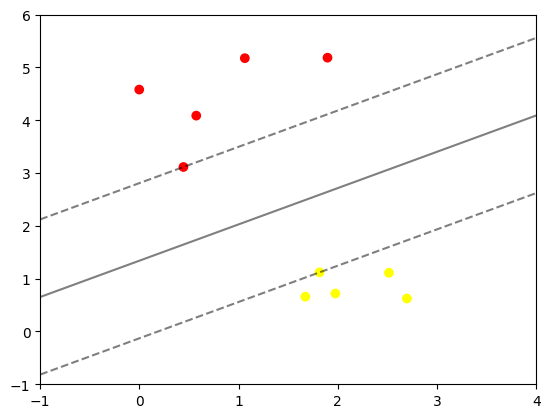

In [8]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

plot_svm()

The  𝚌  argument allows us to specify the cost of a violation to the margin. When the  𝚌  argument is small, then the margins will be wide and many support vectors will be on the margin or will violate the margin. When the  𝚌  argument is large, then the margins will be narrow and there will be few support vectors on the margin or violating the margin.

How do use find the best 𝚌  argument?
Using cross validation

We will see how to use SVM for classifing images of hand-written digits.

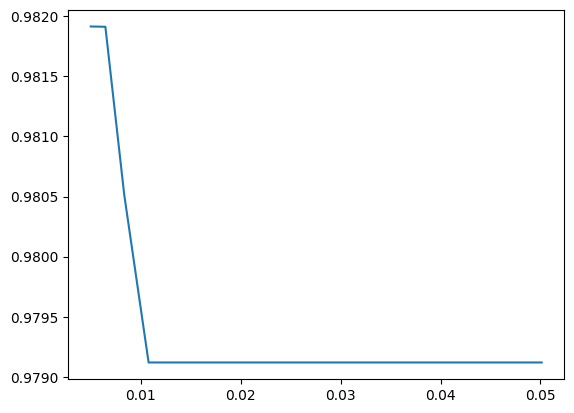

[np.float64(0.9819129887727449), np.float64(0.981910569105691), np.float64(0.9805144212156408), np.float64(0.9791206929926443), np.float64(0.9791206929926443), np.float64(0.9791206929926443), np.float64(0.9791206929926443), np.float64(0.9791206929926443), np.float64(0.9791206929926443), np.float64(0.9791206929926443)]
0.005011872336272725


In [9]:
from sklearn.model_selection import cross_val_score
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits



X, y = load_digits(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =123)
Cs = np.logspace(-2.3, -1.3, 10)
cv_scores = []
for c in Cs:
    model = SVC(kernel="linear", C=c)
    score = cross_val_score(model, x_train, y_train, cv=5, scoring="accuracy")
    cv_scores.append(np.mean(score))

plt.plot(Cs, cv_scores)
plt.show()
print(cv_scores)
print(Cs[np.argmax(cv_scores)])

* Print classification_report, confusion_matrix for the a model with the best c argument

In [10]:
from sklearn.metrics import classification_report, confusion_matrix

svc = SVC(kernel="linear", C = Cs[np.argmax(cv_scores)])
svc.fit(x_train, y_train)

y_pred = svc.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.87      1.00      0.93        34
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        33
           4       1.00      1.00      1.00        42
           5       1.00      0.92      0.96        37
           6       1.00      0.98      0.99        43
           7       0.97      1.00      0.98        31
           8       1.00      0.89      0.94        37
           9       0.93      1.00      0.97        28

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

[[39  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  0  0  0  0  0]
 [ 0  0  0  0 42  0  0  0  0  0]
 [ 0  0  0  0  0 34  0  1  0  2]
 [ 0  1  0  0  0  0 42  0  0  0]
 [ 0  0  0

## Kernel SVM

1. What is called a kernel trick?

- The kernel trick is a method used in Support Vector Machines, to handle non-linearly separable data. It involves mapping the original feature space into a higher-dimensional space where the data points can be linearly separated.

### Most popular kernel types

- Linear            

$k(x_1, x_2) = x_1 * x_2$

- Polynomial

$k(x_1, x_2) = (\gamma x_1 * x_2 + c)^d$

- Gaussian or radial basis 

$k(x_1, x_2) = exp(-\gamma ||x_1 - x_2||^2)$

- Sigmoid

$k(x_1, x_2) = tanh(\gamma x_1 * x_2 + c)$


### Generating data

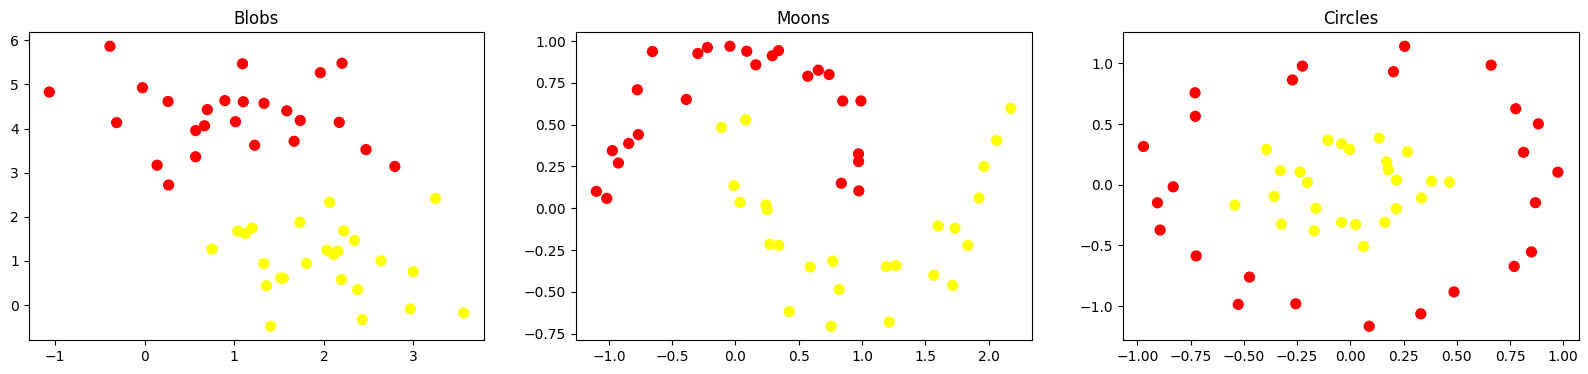

In [11]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles

n_samples = 50
C_const = 100

plt.figure(figsize=(20,4))

X_blob, Y_blob = make_blobs(n_samples=n_samples, centers=2, random_state=0, cluster_std=0.8)
plt.subplot(131)
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=Y_blob, s=50, cmap='autumn')
plt.title("Blobs")

X_moon, Y_moon = make_moons(n_samples=n_samples, noise=0.1, random_state=0)
plt.subplot(132)
plt.title("Moons")
plt.scatter(X_moon[:, 0], X_moon[:, 1], c=Y_moon, s=50, cmap='autumn')

X_circle, Y_circle = make_circles(n_samples=n_samples, factor=0.3, noise=0.1, random_state=0)
plt.subplot(133)
plt.title("Circles")
plt.scatter(X_circle[:, 0], X_circle[:, 1], c=Y_circle, s=50, cmap='autumn')
plt.show()

In [12]:
def plot_svc_decision_function(model, ax=None, plot_support=False):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=30, marker = "x", color="k")
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

### Trying out different kernels

Task: For each dataset, try at east three kernels (linear, rbf, polynomial) with default patameters and plot the results. Analyze them.

In [13]:
from sklearn.svm import SVC
def test_kernels(X, Y):
    plt.figure(figsize=(24, 5))

    linear_model = SVC(kernel="linear")
    linear_model.fit(X,Y)
    plt.subplot(131)
    plt.scatter(X[:, 0], X[:, 1], c=Y)
    plt.title("Linear Kernel")
    plot_svc_decision_function(linear_model)

    gaussian_model = SVC(kernel="rbf")
    gaussian_model.fit(X,Y)
    plt.subplot(132)
    plt.scatter(X[:, 0], X[:, 1], c=Y)
    plt.title("RBF Kernel")
    plot_svc_decision_function(gaussian_model)

    poly_model = SVC(kernel="poly")
    poly_model.fit(X,Y)
    plt.subplot(133)
    plt.scatter(X[:, 0], X[:, 1], c=Y)
    plt.title("Polynomial Kernel")
    plot_svc_decision_function(poly_model)

    plt.show()

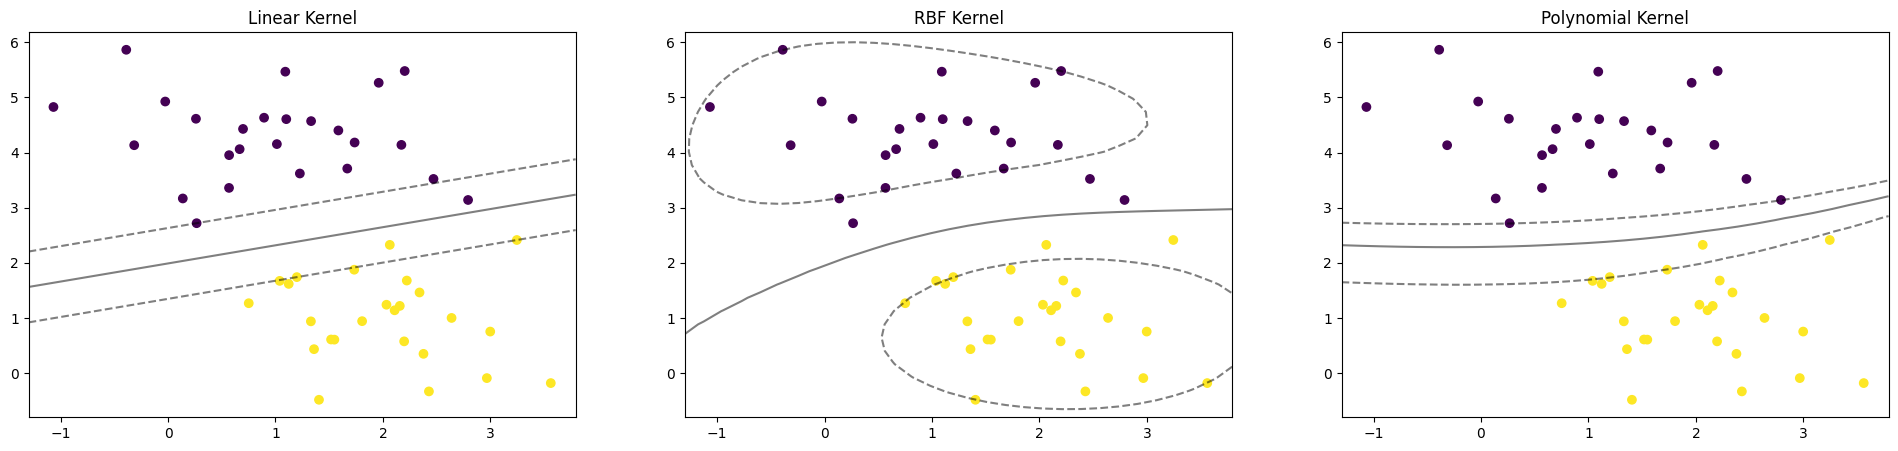

In [14]:
test_kernels(X_blob, Y_blob)

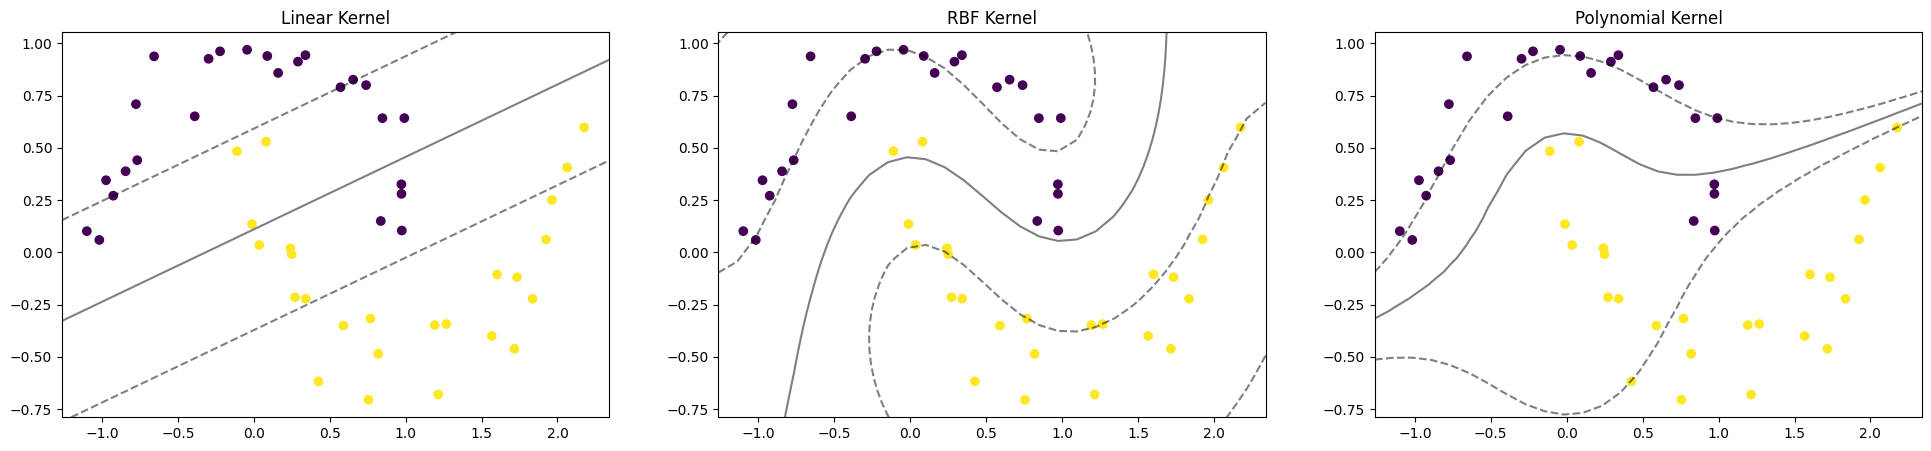

In [15]:
test_kernels(X_moon, Y_moon)

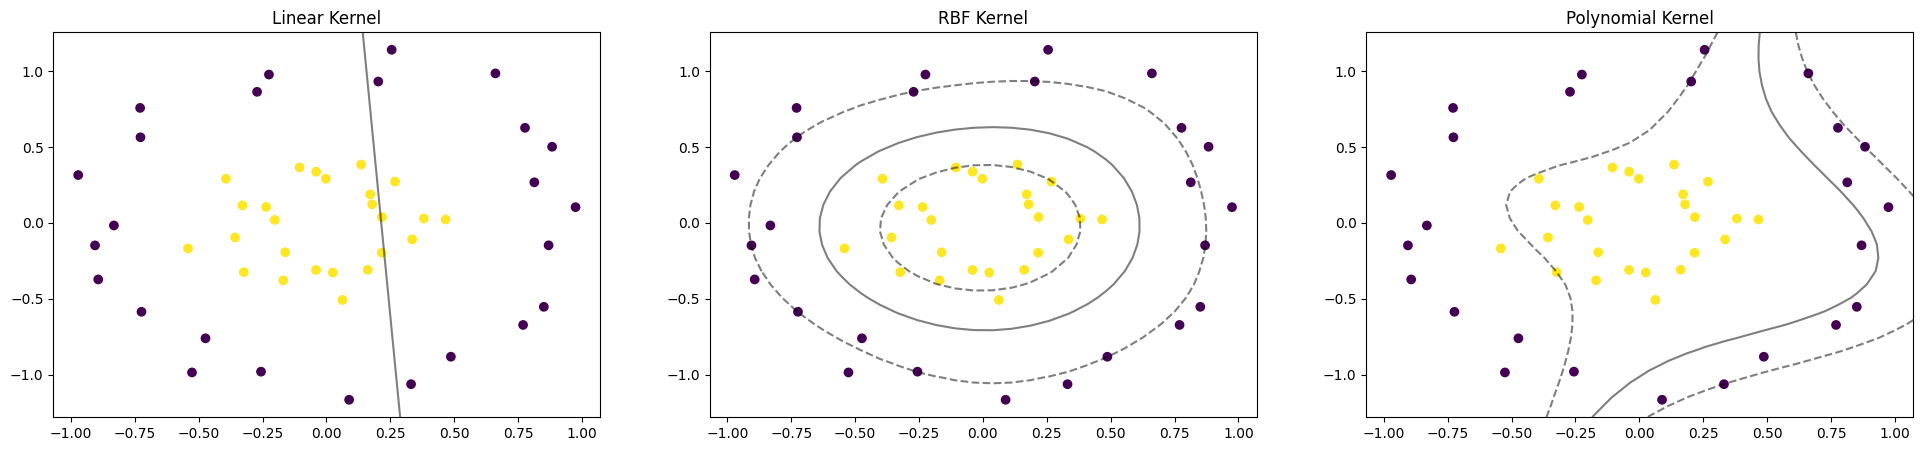

In [16]:
test_kernels(X_circle, Y_circle)

### Exploring parameters effect
Task: Try playing with C, gamma, degree parameters on the moons dataset - choose ones that you think perform best.

**gamma** - determines how close should the point be to hyperplane to have any impact on it. The lower the gamma, the more elements, even those that are far enough from the dividing line, take part in the process of choosing this very line. If, however, the gamma is high, then the algorithm will "rely" only on those elements that are closest to the line itself.

If you set the gamma level too high, then only the elements closest to the line will participate in the process of deciding on the position of the line. This will help ignore outliers in the data.

In [17]:
def test_gamma(gamma_1=1, gamma_2=3, gamma_3=5):
    
    plt.figure(figsize=(24, 5))
    
    model_1 = SVC(kernel="rbf", gamma=gamma_1)
    model_1.fit(X_moon,Y_moon) 
    plt.subplot(131)
    plt.scatter(X_moon[:, 0], X_moon[:, 1], c=Y_moon)
    plt.title("Gamma_1")
    plot_svc_decision_function(model_1)

    model_2 = SVC(kernel="rbf", gamma=gamma_2)
    model_2.fit(X_moon,Y_moon) 
    plt.subplot(132)
    plt.scatter(X_moon[:, 0], X_moon[:, 1], c=Y_moon)
    plt.title("Gamma_2")
    plot_svc_decision_function(model_2)

    model_3 = SVC(kernel="rbf", gamma=gamma_3)
    model_3.fit(X_moon,Y_moon) 
    plt.subplot(133)
    plt.scatter(X_moon[:, 0], X_moon[:, 1], c=Y_moon)
    plt.title("Gamma_3")
    plot_svc_decision_function(model_3)

    plt.show()

def test_degree(degree_1=1, degree_2=3, degree_3=5):

    plt.figure(figsize=(24, 5))

    model_1 = SVC(kernel="poly", degree=degree_1)
    model_1.fit(X_moon,Y_moon) 
    plt.subplot(131)
    plt.scatter(X_moon[:, 0], X_moon[:, 1], c=Y_moon)
    plt.title("Degree_1")
    plot_svc_decision_function(model_1)

    model_2 = SVC(kernel="poly", degree=degree_2)
    model_2.fit(X_moon,Y_moon) 
    plt.subplot(132)
    plt.scatter(X_moon[:, 0], X_moon[:, 1], c=Y_moon)
    plt.title("Degree_2")
    plot_svc_decision_function(model_2)

    model_3 = SVC(kernel="poly", degree=degree_3)
    model_3.fit(X_moon,Y_moon) 
    plt.subplot(133)
    plt.scatter(X_moon[:, 0], X_moon[:, 1], c=Y_moon)
    plt.title("Degree_3")
    plot_svc_decision_function(model_3)

    plt.show()

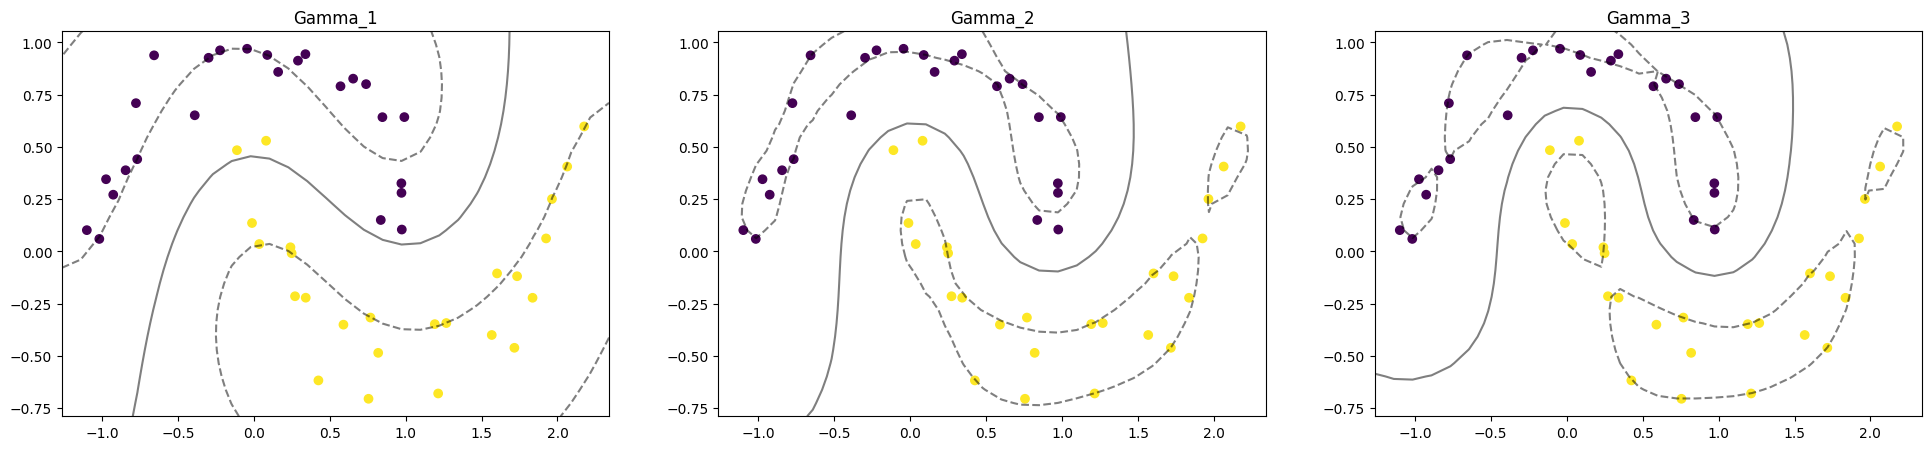

In [18]:
test_gamma()

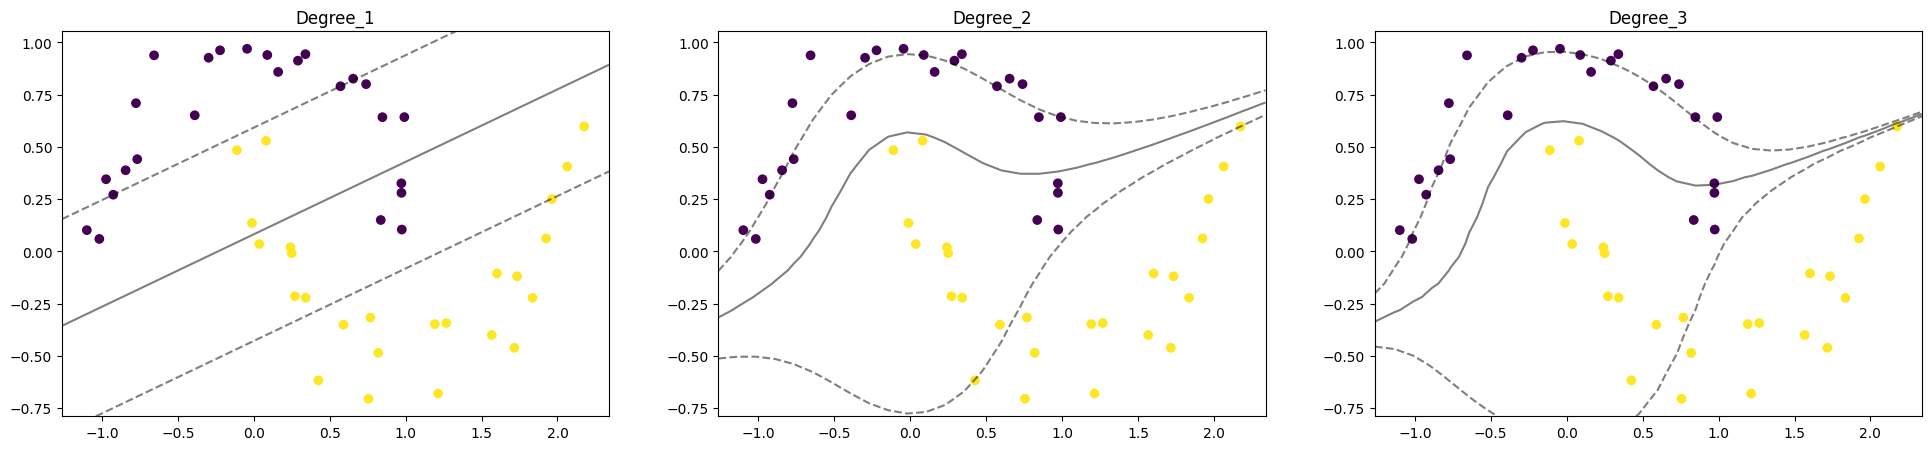

In [19]:
test_degree()